# Calibration transfer

### Classification of one-component VOC gas mixtures. No use of calibration transfer methods

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import LinearSVC 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import random

import warnings
warnings.filterwarnings('ignore')

sample_size = 29   # train_size = sample_size (70/30)
cv = 3             # for inner cross validation 
lsvc_params = {'C':np.logspace(-2,2,5), 'penalty': ['l1'], 'loss': ['hinge']}
ct_methods = ['no_transfer', 'UDS', 'UDS_wco', 'DS', 'DS-PLS2']

class_lsvc = {}

In [2]:
ct_methods = ['no_transfer']

all_data = pd.read_csv('MS 2.1 - 2.2 Samples_individual VOCs.csv', sep=';')
data = all_data.drop(['Sample_#', 'Parallel'], axis=1)

# ma - master, sl - slave

data_ma = data[data.EN_set == 1].drop(['EN_set', 'Conc_ppm', 'Compound'], axis=1) * 1000000
y_ma = data[data.EN_set == 1].loc[:,'Compound']

data_sl = data[data.EN_set == 2].drop(['EN_set', 'Conc_ppm', 'Compound'], axis=1) * 1000000
y_sl = data[data.EN_set == 2].loc[:,'Compound']

data_sl.index = np.arange(y_sl.shape[0])
y_sl.index = np.arange(y_sl.shape[0])

data_ma.index = np.arange(y_ma.shape[0])
y_ma.index = np.arange(y_ma.shape[0])

data_ma_scaled = data_ma.copy()
data_sl_scaled = data_sl.copy()

for ct_method in ct_methods:
    ts_M_M = []
    ts_M_S = []
    ts_S_S = []
    cv_M_M = []
    cv_M_S = []
    cv_S_S = []
    tsnum_list = []
    
    for number_of_ts in range(2,12):
        cv_score_M_M = []
        cv_score_M_S = []
        cv_score_S_S = []
        test_score_M_M = []
        test_score_M_S = []
        test_score_S_S = []

        for i in range(15):
            X_train_ma, X_test_ma, y_train_ma, y_test_ma = train_test_split(data_ma_scaled, y_ma, train_size=sample_size, 
                                                                            stratify=y_ma, random_state=42+i**2)
            X_train_sl, X_test_sl, y_train_sl, y_test_sl = train_test_split(data_sl_scaled, y_sl, train_size=sample_size, 
                                                                            stratify=y_sl, random_state=42+i**2)

            lsvc = LinearSVC(random_state=42, multi_class='crammer_singer')
            lsvc_grid = GridSearchCV(lsvc, param_grid=lsvc_params, scoring='accuracy', n_jobs=-1, cv=cv)
            lsvc_grid.fit(X_train_ma, y_train_ma)
            
            cv_score_M_M.append(cross_val_score(lsvc_grid.best_estimator_, X_train_ma, y_train_ma, scoring='accuracy', n_jobs=-1, cv=cv).mean())
            cv_score_M_S.append(cross_val_score(lsvc_grid.best_estimator_, X_train_sl, y_train_sl, scoring='accuracy', n_jobs=-1, cv=cv).mean())
            test_score_M_M.append(accuracy_score(y_test_ma, lsvc_grid.best_estimator_.predict(X_test_ma)))
            test_score_M_S.append(accuracy_score(y_test_sl, lsvc_grid.best_estimator_.predict(X_test_sl)))
            print(lsvc_grid.best_params_)

            lsvc_grid.fit(X_train_sl, y_train_sl)
            cv_score_S_S.append(cross_val_score(lsvc_grid.best_estimator_, X_train_sl, y_train_sl, scoring='accuracy', n_jobs=-1, cv=cv).mean())
            test_score_S_S.append(accuracy_score(y_test_sl, lsvc_grid.best_estimator_.predict(X_test_sl)))

        cv_M_M.append(np.mean(cv_score_M_M))
        cv_M_S.append(np.mean(cv_score_M_S))
        cv_S_S.append(np.mean(cv_score_S_S)) 
        ts_M_M.append(np.mean(test_score_M_M))
        ts_M_S.append(np.mean(test_score_M_S))
        ts_S_S.append(np.mean(test_score_S_S))
        tsnum_list.append(number_of_ts)
        print('iteration {} is completed'.format(number_of_ts))
        
    x = pd.DataFrame()
    x['ts_M_M'] = ts_M_M
    x['ts_M_S'] = ts_M_S
    x['ts_S_S'] = ts_S_S
    x['cv_M_M'] = cv_M_M
    x['cv_M_S'] = cv_M_S
    x['cv_S_S'] = cv_S_S
    x.index = tsnum_list
    class_lsvc['{}'.format(ct_method)] = x.copy()

    print('model {} is completed'.format(ct_method))

{'C': 0.01, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 0.01, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 0.01, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 0.01, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 0.01, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 0.01, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 0.01, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 0.01, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 0.01, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 0.01, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 0.01, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 0.01, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 0.01, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 0.01, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 0.01, 'loss': 'hinge', 'penalty': 'l1'}
iteration 2 is completed
{'C': 0.01, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 0.01, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 0.01, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 0.01, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 0.01, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 0.01, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 0.0

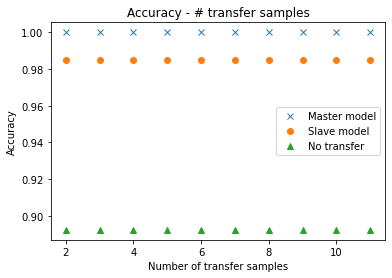

In [3]:
# NO LOG NO SCALERS No transfer - master - slave

z = class_lsvc.copy()
plt.plot(tsnum_list, z['no_transfer']['ts_M_M'], 'x', label='Master model')
plt.plot(tsnum_list, z['no_transfer']['ts_S_S'], 'o', label='Slave model')
plt.plot(tsnum_list, z['no_transfer']['ts_M_S'], '^', label='No transfer')
plt.title('Accuracy - # transfer samples')
plt.xlabel('Number of transfer samples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [4]:
z

{'no_transfer':     ts_M_M    ts_M_S    ts_S_S    cv_M_M    cv_M_S    cv_S_S
 2      1.0  0.892308  0.984615  0.993333  0.970123  0.970123
 3      1.0  0.892308  0.984615  0.993333  0.970123  0.970123
 4      1.0  0.892308  0.984615  0.993333  0.970123  0.970123
 5      1.0  0.892308  0.984615  0.993333  0.970123  0.970123
 6      1.0  0.892308  0.984615  0.993333  0.970123  0.970123
 7      1.0  0.892308  0.984615  0.993333  0.970123  0.970123
 8      1.0  0.892308  0.984615  0.993333  0.970123  0.970123
 9      1.0  0.892308  0.984615  0.993333  0.970123  0.970123
 10     1.0  0.892308  0.984615  0.993333  0.970123  0.970123
 11     1.0  0.892308  0.984615  0.993333  0.970123  0.970123}

### Classification of one-component VOC gas mixtures. Use of various calibration transfer methods

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import LinearSVC
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
import random

import warnings
warnings.filterwarnings('ignore')

sample_size = 29   # train_size = sample_size (70/30)
cv = 3             # for inner cross-validation 
lsvc_params = {'C':np.logspace(-1,0,2), 'penalty': ['l1'], 'loss': ['hinge']}
ct_methods = ['no_transfer', 'UDS', 'UDS_wco', 'DS', 'DS L1', 'DS L2', 'DS L1 L2', 'DS-PLS2']

class_lsvc = {}

In [6]:
ct_methods = ['no_transfer', 'UDS', 'UDS_wco', 'DS L1', 'DS-PLS2']

all_data = pd.read_csv('MS 2.1 - 2.2 Samples_individual VOCs.csv', sep=';')
data = all_data.drop(['Sample_#', 'Parallel'], axis=1)

# ma - master, sl - slave, cl - classification, re - regression

data_ma = np.log(data[data.EN_set == 1].drop(['EN_set', 'Conc_ppm', 'Compound'], axis=1) * 1000000)
y_ma = data[data.EN_set == 1].loc[:,'Compound']

data_sl = np.log(data[data.EN_set == 2].drop(['EN_set', 'Conc_ppm', 'Compound'], axis=1) * 1000000)
y_sl = data[data.EN_set == 2].loc[:,'Compound']

#rewrite indexes

data_sl.index = np.arange(y_sl.shape[0])
y_sl.index = np.arange(y_sl.shape[0])

data_ma.index = np.arange(y_ma.shape[0])
y_ma.index = np.arange(y_ma.shape[0])

scaler_ma = StandardScaler().fit(data_ma)
data_ma_scaled = pd.DataFrame(scaler_ma.transform(data_ma))
scaler_sl = StandardScaler().fit(data_sl)
data_sl_scaled = pd.DataFrame(scaler_sl.transform(data_sl))

all_indices = random.sample(range(0, 42), 12) #random sampling of ts


for ct_method in ct_methods:
    ts_M_M = []
    ts_M_S = []
    ts_S_S = []
    cv_M_M = []
    cv_M_S = []
    cv_S_S = []
    std_M_M = []
    std_M_S = []
    std_S_S = []
    tsnum_list = []
    
    for number_of_ts in range(2,12):
        ts_indices = all_indices[:number_of_ts]
        cv_score_M_M = []
        cv_score_M_S = []
        cv_score_S_S = []
        test_score_M_M = []
        test_score_M_S = []
        test_score_S_S = []

        for i in range(15):
            random.seed(i)
            ts_indices = random.sample(range(0, 42), number_of_ts)   # to del
            X_train_ma, X_test_ma, y_train_ma, y_test_ma = train_test_split(data_ma_scaled.drop(ts_indices),
                                                                            y_ma.drop(ts_indices),
                                                                            train_size=sample_size-number_of_ts, 
                                                                            stratify=y_ma.drop(ts_indices), random_state=42+i**2)
            X_train_sl, X_test_sl, y_train_sl, y_test_sl = train_test_split(data_sl_scaled.drop(ts_indices),
                                                                            y_sl.drop(ts_indices),
                                                                            train_size=sample_size-number_of_ts, 
                                                                            stratify=y_sl.drop(ts_indices), random_state=42+i**2)
            X_train_ma = pd.concat([X_train_ma, data_ma_scaled.iloc[ts_indices,:]])
            X_train_sl = pd.concat([X_train_sl, data_sl_scaled.iloc[ts_indices,:]])
            y_train_ma = pd.concat([y_train_ma, y_ma[ts_indices]])
            y_train_sl = pd.concat([y_train_sl, y_sl[ts_indices]])
            
            #no transfer
            if ct_method == 'no_transfer':
                print('No-transfer')
                
            #UDS
            elif ct_method == 'UDS':
                X_ts_ma = data_ma_scaled.iloc[ts_indices, :]
                X_ts_sl = data_sl_scaled.iloc[ts_indices, :]
                for j in range(X_ts_sl.shape[1]):
                    A = np.vstack([X_ts_sl.iloc[:,j].values, np.ones(X_ts_sl.shape[0])]).T
                    y = X_ts_ma.iloc[:,j].values
                    k, b = np.linalg.lstsq(A, y)[0]
                    X_train_sl.iloc[:,j] = k * X_train_sl.iloc[:,j] + b
                    X_test_sl.iloc[:,j] = k * X_test_sl.iloc[:,j] + b
                    
            #UDS without coef
            elif ct_method == 'UDS_wco':
                X_ts_ma = data_ma_scaled.iloc[ts_indices, :]
                X_ts_sl = data_sl_scaled.iloc[ts_indices, :]
                for j in range(X_ts_sl.shape[1]):
                    A = np.vstack([X_ts_sl.iloc[:,j].values, np.ones(X_ts_sl.shape[0])]).T
                    y = X_ts_ma.iloc[:,j].values
                    k, b = np.linalg.lstsq(A, y)[0]
                    X_train_sl.iloc[:,j] = k * X_train_sl.iloc[:,j]
                    X_test_sl.iloc[:,j] = k * X_test_sl.iloc[:,j]
                    
            #DS MLR + L1 (Lasso)
            elif ct_method == 'DS L1':
                X_ts_ma = data_ma_scaled.iloc[ts_indices, :]
                X_ts_sl = data_sl_scaled.iloc[ts_indices, :]
                for j in range(X_ts_sl.shape[1]):
                    lasso = Lasso(alpha=0.01).fit(X_ts_sl, X_ts_ma.iloc[:,j])
                    X_train_sl.iloc[:,j] = lasso.predict(X_train_sl)
                    X_test_sl.iloc[:,j] = lasso.predict(X_test_sl)
                    
            #DS - PLS2
            elif ct_method == 'DS-PLS2':
                X_ts_ma = data_ma_scaled.iloc[ts_indices, :]
                X_ts_sl = data_sl_scaled.iloc[ts_indices, :]
                pls2 = PLSRegression(n_components=number_of_ts)
                pls2.fit(np.array(X_ts_sl), np.array(X_ts_ma))
                X_train_sl = pd.DataFrame(pls2.predict(X_train_sl), index=y_train_sl.index)
                X_test_sl = pd.DataFrame(pls2.predict(X_test_sl), index=y_test_sl.index)
            else:
                print('method is not found')

            lsvc = LinearSVC(random_state=42, multi_class='crammer_singer')
            lsvc_grid = GridSearchCV(lsvc, param_grid=lsvc_params, scoring='accuracy', n_jobs=-1, cv=cv)
            lsvc_grid.fit(X_train_ma, y_train_ma)
            
            cv_score_M_M.append(cross_val_score(lsvc_grid.best_estimator_, X_train_ma, y_train_ma, scoring='accuracy', n_jobs=-1, cv=cv).mean())
            cv_score_M_S.append(cross_val_score(lsvc_grid.best_estimator_, X_train_sl, y_train_sl, scoring='accuracy', n_jobs=-1, cv=cv).mean())
            test_score_M_M.append(accuracy_score(y_test_ma, lsvc_grid.best_estimator_.predict(X_test_ma)))
            test_score_M_S.append(accuracy_score(y_test_sl, lsvc_grid.best_estimator_.predict(X_test_sl)))
            print(lsvc_grid.best_params_)

            lsvc_grid.fit(X_train_sl, y_train_sl)
            cv_score_S_S.append(cross_val_score(lsvc_grid.best_estimator_, X_train_sl, y_train_sl, scoring='accuracy', n_jobs=-1, cv=cv).mean())
            test_score_S_S.append(accuracy_score(y_test_sl, lsvc_grid.best_estimator_.predict(X_test_sl)))

        cv_M_M.append(np.mean(cv_score_M_M))
        cv_M_S.append(np.mean(cv_score_M_S))
        cv_S_S.append(np.mean(cv_score_S_S)) 
        ts_M_M.append(np.mean(test_score_M_M))
        ts_M_S.append(np.mean(test_score_M_S))
        ts_S_S.append(np.mean(test_score_S_S))
        std_M_M.append(np.std(test_score_M_M))
        std_M_S.append(np.std(test_score_M_S))
        std_S_S.append(np.std(test_score_S_S))
        tsnum_list.append(number_of_ts)
        print('iteration {} is completed'.format(number_of_ts))
        
    x = pd.DataFrame()
    x['ts_M_M'] = ts_M_M
    x['ts_M_S'] = ts_M_S
    x['ts_S_S'] = ts_S_S
    #x['cv_M_M'] = cv_M_M
    #x['cv_M_S'] = cv_M_S
    #x['cv_S_S'] = cv_S_S
    x['std_M_M'] = std_M_M
    x['std_M_S'] = std_M_S
    x['std_S_S'] = std_S_S
    x.index = tsnum_list
    class_lsvc['{}'.format(ct_method)] = x.copy()

    print('model {} is completed'.format(ct_method))

No-transfer
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
No-transfer
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
No-transfer
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
No-transfer
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
No-transfer
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
No-transfer
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
No-transfer
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
No-transfer
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
No-transfer
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
No-transfer
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
No-transfer
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
No-transfer
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
No-transfer
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
No-transfer
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
No-transfer
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
iteration 2 is completed
No-transfer
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
No-transfer
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
No-tra

No-transfer
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
No-transfer
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
No-transfer
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
No-transfer
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
No-transfer
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
No-transfer
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
No-transfer
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
No-transfer
{'C': 0.1, 'loss': 'hinge', 'penalty': 'l1'}
No-transfer
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
iteration 11 is completed
model no_transfer is completed
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 1.0, 'loss': 'hinge

{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
iteration 2 is completed
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 0.1, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 0.1, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 0.1, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
iteration 3 is completed
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 0.1, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 0.1, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C':

{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
iteration 4 is completed
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 0.1, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
iteration 5 is completed
{'C':

{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
iteration 6 is completed
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l1'}
{'C': 1.0, 'loss': 'hinge', 'p

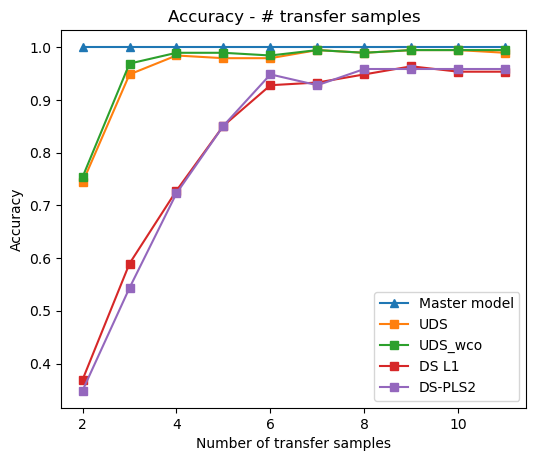

In [7]:
# individuals final

plt.figure(figsize=(6,5), dpi=100)
z = class_lsvc.copy()
plt.plot(tsnum_list, z['no_transfer']['ts_M_M'], '-^', label='Master model')
#plt.plot(tsnum_list, z['no_transfer']['ts_S_S'], label='Slave model')
plt.plot(tsnum_list, z['UDS']['ts_M_S'],'-s', label='UDS')
plt.plot(tsnum_list, z['UDS_wco']['ts_M_S'], '-s', label='UDS_wco')
plt.plot(tsnum_list, z['DS L1']['ts_M_S'], '-s', label='DS L1')
plt.plot(tsnum_list, z['DS-PLS2']['ts_M_S'], '-s', label='DS-PLS2')
plt.title('Accuracy - # transfer samples')
plt.xlabel('Number of transfer samples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [8]:
z

{'no_transfer':     ts_M_M    ts_M_S  ts_S_S  std_M_M   std_M_S  std_S_S
 2      1.0  0.984615     1.0      0.0  0.030769      0.0
 3      1.0  0.989744     1.0      0.0  0.026149      0.0
 4      1.0  0.984615     1.0      0.0  0.030769      0.0
 5      1.0  0.984615     1.0      0.0  0.030769      0.0
 6      1.0  0.989744     1.0      0.0  0.026149      0.0
 7      1.0  0.989744     1.0      0.0  0.026149      0.0
 8      1.0  0.989744     1.0      0.0  0.026149      0.0
 9      1.0  0.989744     1.0      0.0  0.026149      0.0
 10     1.0  0.989744     1.0      0.0  0.026149      0.0
 11     1.0  0.979487     1.0      0.0  0.034017      0.0,
 'UDS':     ts_M_M    ts_M_S  ts_S_S  std_M_M   std_M_S  std_S_S
 2      1.0  0.743590     1.0      0.0  0.264488      0.0
 3      1.0  0.948718     1.0      0.0  0.172387      0.0
 4      1.0  0.984615     1.0      0.0  0.030769      0.0
 5      1.0  0.979487     1.0      0.0  0.044114      0.0
 6      1.0  0.979487     1.0      0.0  0.059363 

### Classification of three-component VOC gas mixtures. Use of various calibration transfer methods 

In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import LinearSVC
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
import random

import warnings
warnings.filterwarnings('ignore')

sample_size = 14
n_components = 18 

cv = 3
ct_methods = ['no_transfer', 'UDS', 'UDS_wco', 'DS L1', 'DS-PLS2']

lsvc_params = {'C':np.logspace(-8,-4,5)}

class_lsvc = {}

In [10]:
df = pd.read_csv('MS 2.1 - 2.2 Samples_mixtures.csv', sep=';')
data = df.drop(['Vp', 'Vh', 'Vx', 'Parallel'], axis=1)

data_ma = np.log(data[data.EN_set == 1].drop(['Compound', 'EN_set'], axis=1) * 1000000)
data_sl = np.log(data[data.EN_set == 2].drop(['Compound', 'EN_set'], axis=1) * 1000000)

y_ma = data[data.EN_set == 1].loc[:,'Compound']
y_sl = data[data.EN_set == 2].loc[:,'Compound']

#rewrite indexes

data_sl.index = np.arange(y_sl.shape[0])
y_sl.index = np.arange(y_sl.shape[0])

data_ma.index = np.arange(y_ma.shape[0])
y_ma.index = np.arange(y_ma.shape[0])

#scaling datasets

scaler_ma = StandardScaler().fit(data_ma)
data_ma_scaled = pd.DataFrame(scaler_ma.transform(data_ma))
scaler_sl = StandardScaler().fit(data_sl)
data_sl_scaled = pd.DataFrame(scaler_sl.transform(data_sl))

for ct_method in ct_methods:
    ts_M_M = []
    ts_M_S = []
    ts_S_S = []
    cv_M_M = []
    cv_M_S = []
    cv_S_S = []
    std_M_M = []
    std_M_S = []
    std_S_S = []
    tsnum_list = []
    
    for number_of_ts in range(2,9):
        cv_score_M_M = []
        cv_score_M_S = []
        cv_score_S_S = []
        test_score_M_M = []
        test_score_M_S = []
        test_score_S_S = []

        for i in range(15):
            random.seed(i)
            ts_indices = random.sample(range(0, 16), number_of_ts)   # to del
            X_train_ma, X_test_ma, y_train_ma, y_test_ma = train_test_split(data_ma_scaled.drop(ts_indices), y_ma.drop(ts_indices), train_size=sample_size-number_of_ts, 
                                                                            stratify=y_ma.drop(ts_indices), random_state=42+i**2)
            X_train_sl, X_test_sl, y_train_sl, y_test_sl = train_test_split(data_sl_scaled.drop(ts_indices), y_sl.drop(ts_indices), train_size=sample_size-number_of_ts, 
                                                                                    stratify=y_sl.drop(ts_indices), random_state=42+i**2)

            X_train_ma = pd.concat([X_train_ma, data_ma_scaled.iloc[ts_indices,:]])
            X_train_sl = pd.concat([X_train_sl, data_sl_scaled.iloc[ts_indices,:]])
            y_train_ma = pd.concat([y_train_ma, y_ma[ts_indices]])
            y_train_sl = pd.concat([y_train_sl, y_sl[ts_indices]])
            
            #no transfer
            if ct_method == 'no_transfer':
                print('No-transfer')
                
            #UDS
            elif ct_method == 'UDS':
                X_ts_ma = data_ma_scaled.iloc[ts_indices, :]
                X_ts_sl = data_sl_scaled.iloc[ts_indices, :]
                for j in range(X_ts_sl.shape[1]):
                    A = np.vstack([X_ts_sl.iloc[:,j].values, np.ones(X_ts_sl.shape[0])]).T
                    y = X_ts_ma.iloc[:,j].values
                    k, b = np.linalg.lstsq(A, y)[0]
                    X_train_sl.iloc[:,j] = k * X_train_sl.iloc[:,j] + b
                    X_test_sl.iloc[:,j] = k * X_test_sl.iloc[:,j] + b
            
            #UDS without coef
            elif ct_method == 'UDS_wco':
                X_ts_ma = data_ma_scaled.iloc[ts_indices, :]
                X_ts_sl = data_sl_scaled.iloc[ts_indices, :]
                for j in range(X_ts_sl.shape[1]):
                    A = np.vstack([X_ts_sl.iloc[:,j].values, np.ones(X_ts_sl.shape[0])]).T
                    y = X_ts_ma.iloc[:,j].values
                    k, b = np.linalg.lstsq(A, y)[0]
                    X_train_sl.iloc[:,j] = k * X_train_sl.iloc[:,j]
                    X_test_sl.iloc[:,j] = k * X_test_sl.iloc[:,j]
                    
            #DS MLR + L1 (Lasso)
            elif ct_method == 'DS L1':
                X_ts_ma = data_ma_scaled.iloc[ts_indices, :]
                X_ts_sl = data_sl_scaled.iloc[ts_indices, :]
                for j in range(X_ts_sl.shape[1]):
                    lasso = Lasso(alpha=0.01).fit(X_ts_sl, X_ts_ma.iloc[:,j])
                    X_train_sl.iloc[:,j] = lasso.predict(X_train_sl)
                    X_test_sl.iloc[:,j] = lasso.predict(X_test_sl)
            
            #DS - PLS2
            elif ct_method == 'DS-PLS2':
                X_ts_ma = data_ma_scaled.iloc[ts_indices, :]
                X_ts_sl = data_sl_scaled.iloc[ts_indices, :]
                pls2 = PLSRegression(n_components=number_of_ts)
                pls2.fit(np.array(X_ts_sl), np.array(X_ts_ma))
                X_train_sl = pd.DataFrame(pls2.predict(X_train_sl), index=y_train_sl.index)
                X_test_sl = pd.DataFrame(pls2.predict(X_test_sl), index=y_test_sl.index)
            else:
                print('method is not found')

            lsvc = LinearSVC(random_state=42)
            lsvc_grid = GridSearchCV(lsvc, param_grid=lsvc_params, scoring='accuracy', n_jobs=-1, cv=cv)
            lsvc_grid.fit(X_train_ma, y_train_ma)
            
            cv_score_M_M.append(cross_val_score(lsvc_grid.best_estimator_, X_train_ma, y_train_ma, scoring='accuracy', n_jobs=-1, cv=cv).mean())
            cv_score_M_S.append(cross_val_score(lsvc_grid.best_estimator_, X_train_sl, y_train_sl, scoring='accuracy', n_jobs=-1, cv=cv).mean())
            test_score_M_M.append(accuracy_score(y_test_ma, lsvc_grid.best_estimator_.predict(X_test_ma)))
            test_score_M_S.append(accuracy_score(y_test_sl, lsvc_grid.best_estimator_.predict(X_test_sl)))
            print(lsvc_grid.best_params_)

            lsvc_grid.fit(X_train_sl, y_train_sl)
            cv_score_S_S.append(cross_val_score(lsvc_grid.best_estimator_, X_train_sl, y_train_sl, scoring='accuracy', n_jobs=-1, cv=cv).mean())
            test_score_S_S.append(accuracy_score(y_test_sl, lsvc_grid.best_estimator_.predict(X_test_sl)))

        cv_M_M.append(np.mean(cv_score_M_M))
        cv_M_S.append(np.mean(cv_score_M_S))
        cv_S_S.append(np.mean(cv_score_S_S)) 
        ts_M_M.append(np.mean(test_score_M_M))
        ts_M_S.append(np.mean(test_score_M_S))
        ts_S_S.append(np.mean(test_score_S_S))
        std_M_M.append(np.std(test_score_M_M))
        std_M_S.append(np.std(test_score_M_S))
        std_S_S.append(np.std(test_score_S_S))
        tsnum_list.append(number_of_ts)
        print('iteration {} is completed'.format(number_of_ts))
        
    x = pd.DataFrame()
    x['ts_M_M'] = ts_M_M
    x['ts_M_S'] = ts_M_S
    x['ts_S_S'] = ts_S_S
    #x['cv_M_M'] = cv_M_M
    #x['cv_M_S'] = cv_M_S
    #x['cv_S_S'] = cv_S_S
    x['std_M_M'] = std_M_M
    x['std_M_S'] = std_M_S
    x['std_S_S'] = std_S_S
    x.index = tsnum_list
    class_lsvc['{}'.format(ct_method)] = x.copy()

    print('model {} is completed'.format(ct_method))

No-transfer
{'C': 1e-08}
No-transfer
{'C': 1e-08}
No-transfer
{'C': 1e-08}
No-transfer
{'C': 1e-08}
No-transfer
{'C': 1e-08}
No-transfer
{'C': 1e-08}
No-transfer
{'C': 1e-08}
No-transfer
{'C': 1e-08}
No-transfer
{'C': 1e-08}
No-transfer
{'C': 1e-08}
No-transfer
{'C': 1e-08}
No-transfer
{'C': 1e-08}
No-transfer
{'C': 1e-08}
No-transfer
{'C': 1e-08}
No-transfer
{'C': 1e-08}
iteration 2 is completed
No-transfer
{'C': 1e-08}
No-transfer
{'C': 1e-08}
No-transfer
{'C': 1e-08}
No-transfer
{'C': 1e-08}
No-transfer
{'C': 1e-08}
No-transfer
{'C': 1e-08}
No-transfer
{'C': 1e-08}
No-transfer
{'C': 1e-08}
No-transfer
{'C': 1e-08}
No-transfer
{'C': 1e-08}
No-transfer
{'C': 1e-08}
No-transfer
{'C': 1e-08}
No-transfer
{'C': 1e-08}
No-transfer
{'C': 1e-08}
No-transfer
{'C': 1e-08}
iteration 3 is completed
No-transfer
{'C': 1e-08}
No-transfer
{'C': 1e-08}
No-transfer
{'C': 1e-08}
No-transfer
{'C': 1e-08}
No-transfer
{'C': 1e-08}
No-transfer
{'C': 1e-08}
No-transfer
{'C': 1e-08}
No-transfer
{'C': 1e-08}


{'C': 1e-08}
{'C': 1e-08}
{'C': 1e-08}
{'C': 1e-08}
{'C': 1e-08}
{'C': 1e-08}
{'C': 1e-08}
{'C': 1e-08}
{'C': 1e-08}
{'C': 1e-08}
{'C': 1e-08}
{'C': 1e-08}
iteration 5 is completed
{'C': 1e-08}
{'C': 1e-08}
{'C': 1e-08}
{'C': 1e-08}
{'C': 1e-08}
{'C': 1e-08}
{'C': 1e-08}
{'C': 1e-08}
{'C': 1e-08}
{'C': 1e-08}
{'C': 1e-08}
{'C': 1e-08}
{'C': 1e-08}
{'C': 1e-08}
{'C': 1e-08}
iteration 6 is completed
{'C': 1e-08}
{'C': 1e-08}
{'C': 1e-08}
{'C': 1e-08}
{'C': 1e-08}
{'C': 1e-08}
{'C': 1e-08}
{'C': 1e-08}
{'C': 1e-08}
{'C': 1e-08}
{'C': 1e-08}
{'C': 1e-08}
{'C': 1e-08}
{'C': 1e-08}
{'C': 1e-08}
iteration 7 is completed
{'C': 1e-08}
{'C': 1e-08}
{'C': 1e-08}
{'C': 1e-08}
{'C': 1e-08}
{'C': 1e-08}
{'C': 1e-08}
{'C': 1e-08}
{'C': 1e-08}
{'C': 1e-08}
{'C': 1e-08}
{'C': 1e-08}
{'C': 1e-08}
{'C': 1e-08}
{'C': 1e-08}
iteration 8 is completed
model DS-PLS2 is completed


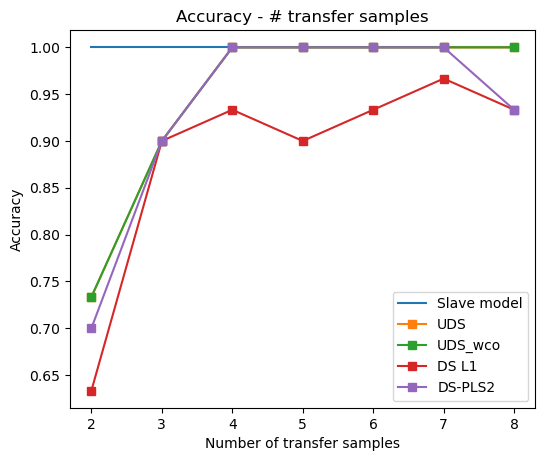

In [11]:
# mixtures final

plt.figure(figsize=(6,5), dpi=100)
z = class_lsvc.copy()
#plt.plot(tsnum_list, z['no_transfer']['ts_M_M'], '-^', label='Master model')
plt.plot(tsnum_list, z['no_transfer']['ts_S_S'], label='Slave model')
plt.plot(tsnum_list, z['UDS']['ts_M_S'],'-s', label='UDS')
plt.plot(tsnum_list, z['UDS_wco']['ts_M_S'], '-s', label='UDS_wco')
plt.plot(tsnum_list, z['DS L1']['ts_M_S'], '-s', label='DS L1')
plt.plot(tsnum_list, z['DS-PLS2']['ts_M_S'], '-s', label='DS-PLS2')
plt.title('Accuracy - # transfer samples')
plt.xlabel('Number of transfer samples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [12]:
z

{'no_transfer':    ts_M_M  ts_M_S  ts_S_S  std_M_M  std_M_S  std_S_S
 2     1.0     1.0     1.0      0.0      0.0      0.0
 3     1.0     1.0     1.0      0.0      0.0      0.0
 4     1.0     1.0     1.0      0.0      0.0      0.0
 5     1.0     1.0     1.0      0.0      0.0      0.0
 6     1.0     1.0     1.0      0.0      0.0      0.0
 7     1.0     1.0     1.0      0.0      0.0      0.0
 8     1.0     1.0     1.0      0.0      0.0      0.0,
 'UDS':    ts_M_M    ts_M_S  ts_S_S  std_M_M   std_M_S   std_S_S
 2     1.0  0.733333     0.7      0.0  0.249444  0.244949
 3     1.0  0.900000     0.9      0.0  0.200000  0.200000
 4     1.0  1.000000     1.0      0.0  0.000000  0.000000
 5     1.0  1.000000     1.0      0.0  0.000000  0.000000
 6     1.0  1.000000     1.0      0.0  0.000000  0.000000
 7     1.0  1.000000     1.0      0.0  0.000000  0.000000
 8     1.0  1.000000     1.0      0.0  0.000000  0.000000,
 'UDS_wco':    ts_M_M    ts_M_S    ts_S_S  std_M_M   std_M_S   std_S_S
 2     1.

### PCA representation for mixtures

In [13]:
#libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
#from samples_selection_algo import kennardstone

In [14]:
df = pd.read_csv('MS 2.1 - 2.2 Samples_mixtures.csv', sep=';')
data = df.drop(['Vp', 'Vh', 'Vx', 'Parallel'], axis=1)

data_ma = data[data.EN_set == 1].drop('EN_set', axis=1)
data_sl = data[data.EN_set == 2].drop('EN_set', axis=1)

X_ma = data_ma.drop('Compound', axis=1)
y_ma = data_ma.Compound.values

X_sl = data_sl.drop('Compound', axis=1)
y_sl = data_sl.Compound.values

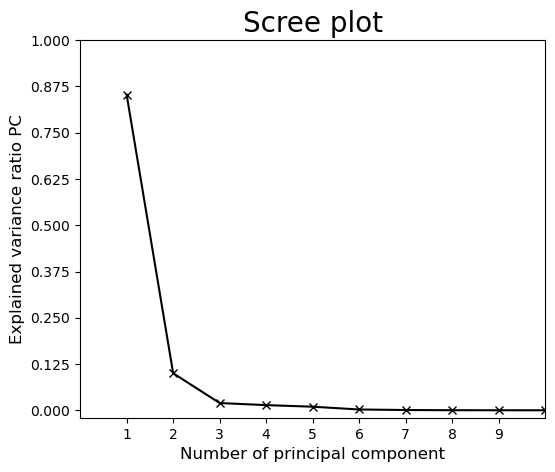

In [15]:
random_seed = 2
pca = PCA(random_state=random_seed)
df_pca_ma = pca.fit_transform(X_ma)

plt.figure(figsize=(6,5), dpi=100)
plt.title('Scree plot', fontsize=20)
plt.plot(range(1,17), pca.explained_variance_ratio_, 'x-', c='black')

plt.ylim(-0.02,0.99)
plt.xlim(0,10)
plt.xticks(range(1,10,1),fontsize=10)
plt.yticks(np.linspace(0, 1, 9), fontsize=10)
plt.ylabel('Explained variance ratio PC', fontsize=12)
plt.xlabel('Number of principal component', fontsize=12)
plt.show()

<Figure size 864x576 with 0 Axes>

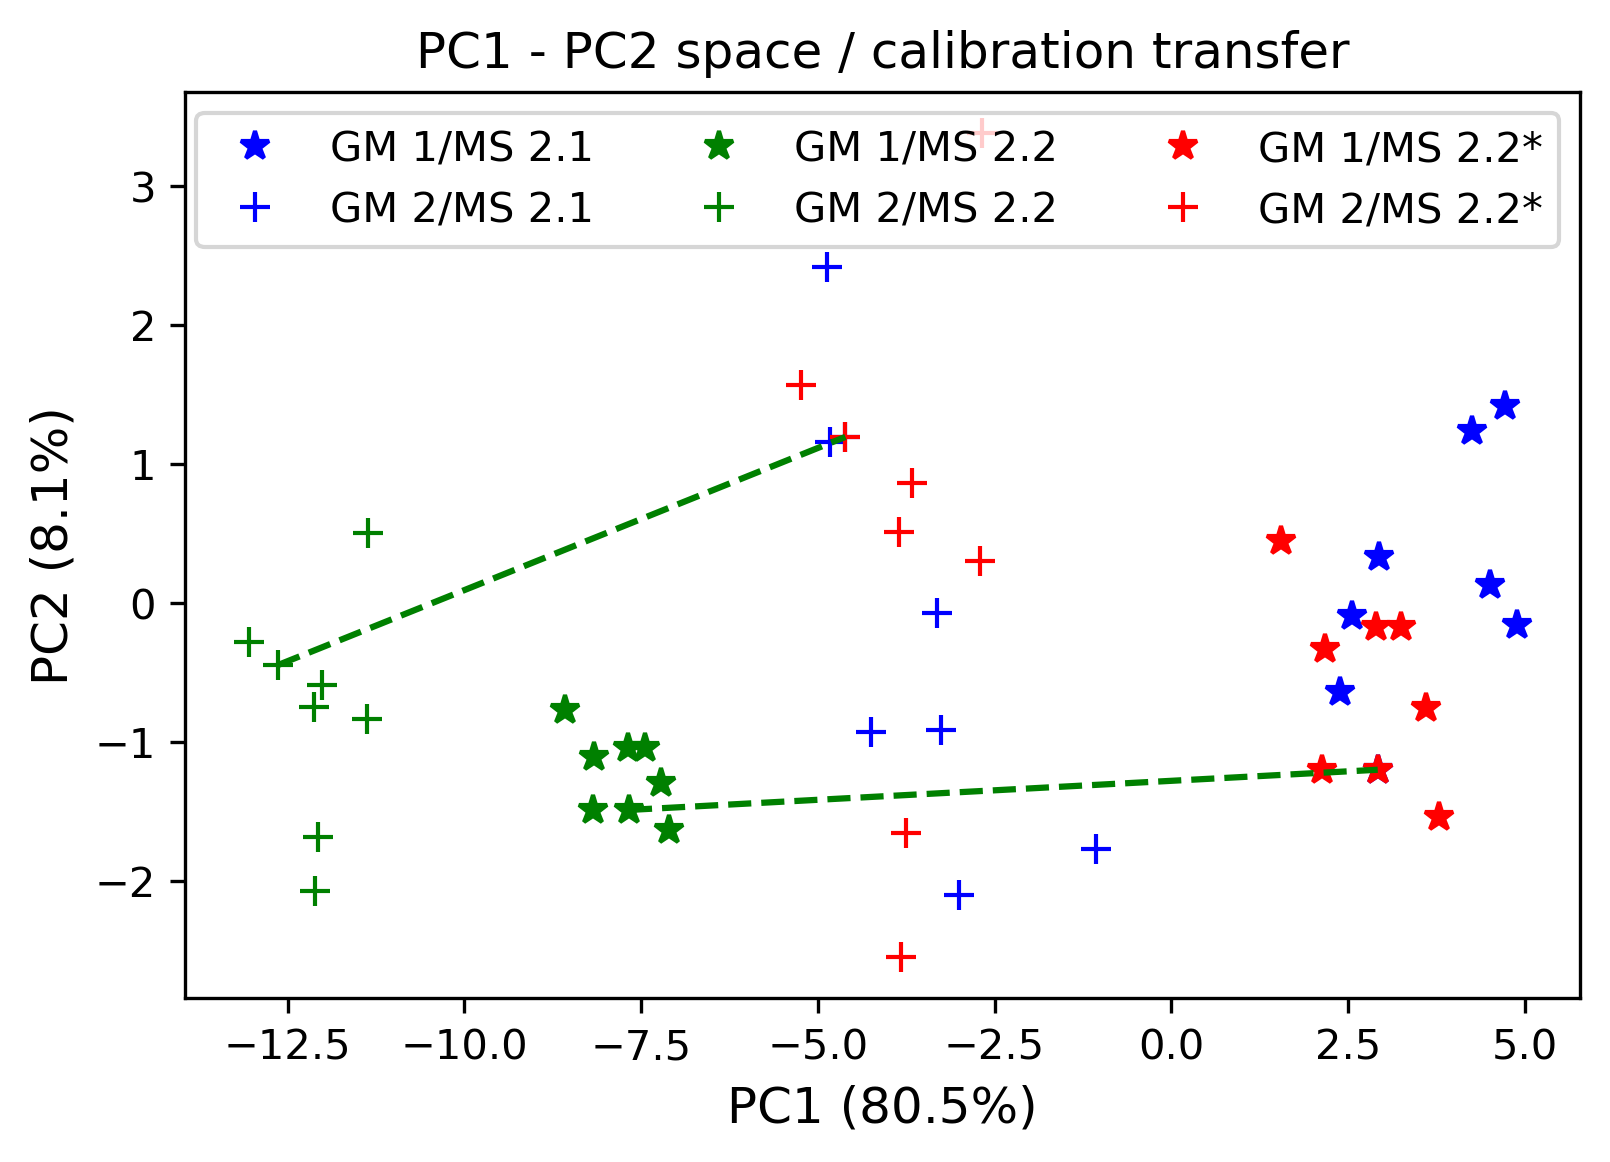

In [16]:
scaler_ma = StandardScaler().fit(X_ma)

df_pca_ma = pd.DataFrame(pca.fit_transform(scaler_ma.transform(X_ma)))
df_pca_sl = pd.DataFrame(pca.transform(scaler_ma.transform(X_sl)))


# Manual ts sampling

ts_indices = [3, 5]
number_of_ts = len(ts_indices)

X_ts_ma = df_pca_ma.iloc[ts_indices, :].copy()
X_ts_sl = df_pca_sl.iloc[ts_indices, :].copy()

# UDS
df_pca_sl_corr = df_pca_sl.copy()

for j in range(X_ts_sl.shape[1]):
    A = np.vstack([X_ts_sl.iloc[:,j].values, np.ones(X_ts_sl.shape[0])]).T
    y = X_ts_ma.iloc[:,j].values
    k, b = np.linalg.lstsq(A, y)[0]
    df_pca_sl_corr.iloc[:,j] = k * df_pca_sl.iloc[:,j] + b


df_pca_ma['Compound'] = y_ma
df_pca_sl['Compound'] = y_sl
df_pca_sl_corr['Compound'] = y_sl

ms = 7
plt.figure(figsize=(12,8))
plt.figure(dpi=300)

plt.plot(df_pca_ma[df_pca_ma.Compound == 'mix_555'].iloc[:,0], df_pca_ma[df_pca_ma.Compound == 'mix_555'].iloc[:,1], '*', c='blue', markersize=ms, label='GM 1/MS 2.1')
plt.plot(df_pca_ma[df_pca_ma.Compound == 'mix_456'].iloc[:,0], df_pca_ma[df_pca_ma.Compound == 'mix_456'].iloc[:,1], '+', c='blue', markersize=ms, label='GM 2/MS 2.1')

plt.plot(df_pca_sl[df_pca_sl.Compound == 'mix_555'].iloc[:,0], df_pca_sl[df_pca_sl.Compound == 'mix_555'].iloc[:,1], '*', c='green', markersize=ms, label='GM 1/MS 2.2')
plt.plot(df_pca_sl[df_pca_sl.Compound == 'mix_456'].iloc[:,0], df_pca_sl[df_pca_sl.Compound == 'mix_456'].iloc[:,1], '+', c='green', markersize=ms, label='GM 2/MS 2.2')

plt.plot(df_pca_sl_corr[df_pca_sl_corr.Compound == 'mix_555'].iloc[:,0], df_pca_sl_corr[df_pca_sl_corr.Compound == 'mix_555'].iloc[:,1], '*', c='red', markersize=ms, label='GM 1/MS 2.2*')
plt.plot(df_pca_sl_corr[df_pca_sl_corr.Compound == 'mix_456'].iloc[:,0], df_pca_sl_corr[df_pca_sl_corr.Compound == 'mix_456'].iloc[:,1], '+', c='red', markersize=ms, label='GM 2/MS 2.2*')

for i in ts_indices:
    x_values = [df_pca_sl.iloc[i, 0], df_pca_sl_corr.iloc[i, 0]]
    y_values = [df_pca_sl.iloc[i, 1], df_pca_sl_corr.iloc[i, 1]]
    plt.plot(x_values, y_values, '--', c='green')

plt.title("PC1 - PC2 space / calibration transfer")
plt.xlabel('PC{} '.format(1) + '({}%)'.format(round(pca.explained_variance_ratio_[0]*100, 1)), fontsize=12)
plt.ylabel('PC{} '.format(2) + '({}%)'.format(round(pca.explained_variance_ratio_[1]*100, 1)), fontsize=12)

plt.legend(loc='best', ncol=3)